#### Function for displaying a visualization of a 2x2 matrix as a transformation on a unit circle and unit square

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Matrix

import math

def visualize_matrix_transformation_2(A):
    """
    Visualizes the effect of a 2x2 matrix on a unit circle and a unit square,
    with each quadrant colored differently.

    Parameters:
        A (numpy.ndarray): 2x2 transformation matrix
    """
    # Sympy matrix
    As = Matrix(A)
    display(As)

    # Generate unit circle points
    theta = np.linspace(0, 2 * np.pi, 100)
    unit_circle = np.vstack([np.cos(theta), np.sin(theta)])  # 2x100 matrix

    # Define unit square
    unit_square = np.array([[-1, 1, 1, -1, -1],
                             [-1, -1, 1, 1, -1]])  # Closed loop

    # Compute eigenvectors and eigenvalues
    eigvals, eigvecs = np.linalg.eig(A)
    eigvecs = np.real(eigvecs)  # Ensure real values in case of complex numbers
    eigvecs_normalized = eigvecs / np.linalg.norm(eigvecs, axis=0)  # Normalize eigenvectors
    transformed_eigvecs = A @ eigvecs_normalized  # Transform eigenvectors

    # Apply matrix transformation
    transformed_circle = A @ unit_circle
    transformed_square = A @ unit_square

    # Define quadrant colors
    colors = ['red', 'blue', 'green', 'purple']
    quadrant_masks = [(unit_circle[0] >= 0) & (unit_circle[1] >= 0),
                      (unit_circle[0] < 0) & (unit_circle[1] >= 0),
                      (unit_circle[0] < 0) & (unit_circle[1] < 0),
                      (unit_circle[0] >= 0) & (unit_circle[1] < 0)]

    # Determine max boundary for plots
    max_bound = math.ceil(max(np.max(np.abs(transformed_circle[0])), np.max(np.abs(transformed_circle[1]))) + 0.1)
    max_bound = min(max_bound, 100)
    plot_dim = (-max_bound, max_bound)

    # Plot original and transformed shapes
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Plot original unit circle and square
    ax[0].set_title("Original Unit Circle and Square")
    ax[0].plot(unit_square[0], unit_square[1], color='black', linewidth=0.8)
    for mask, color in zip(quadrant_masks, colors):
        ax[0].plot(unit_circle[0, mask], unit_circle[1, mask], color=color, linewidth=2)
    # Plot eigenvectors
    for i in range(2):
        ax[0].quiver(0, 0, eigvecs_normalized[0, i], eigvecs_normalized[1, i], angles='xy', scale_units='xy', scale=1, color='orange', linewidth=1.5)
    ax[0].axhline(0, color='black', linewidth=0.2)
    ax[0].axvline(0, color='black', linewidth=0.2)
    ax[0].set_xlim(*plot_dim)
    ax[0].set_ylim(*plot_dim)
    ax[0].set_aspect('equal')
    ax[0].grid(True)

    # Plot transformed unit circle and square
    ax[1].set_title("Transformed Unit Circle and Square")
    ax[1].plot(transformed_square[0], transformed_square[1], color='black', linewidth=0.8)
    for mask, color in zip(quadrant_masks, colors):
        ax[1].plot(transformed_circle[0, mask], transformed_circle[1, mask], color=color, linewidth=2)
    # Plot transformed eigenvectors
    for i in range(2):
        ax[1].quiver(0, 0, transformed_eigvecs[0, i], transformed_eigvecs[1, i], angles='xy', scale_units='xy', scale=1, color='orange', linewidth=1.5)
    ax[1].axhline(0, color='black', linewidth=0.2)
    ax[1].axvline(0, color='black', linewidth=0.2)
    ax[1].set_xlim(*plot_dim)
    ax[1].set_ylim(*plot_dim)
    ax[1].set_aspect('equal')
    ax[1].grid(True)

    plt.show()

### Function for visualizing the SVD of a 2x2 matrix as separate trasformations

In [11]:
def visualize_svd_2(A):
    """
    Visualizes the Singular Value Decomposition (SVD) of a 2x2 matrix by
    displaying transformations of:

    1. A^T A and A A^T
    2. V^T (rotation)
    3. Σ (scaling)
    4. U (rotation)
    5. The full transformation A itself

    Parameters:
        A (numpy.ndarray): 2x2 transformation matrix
    """
    # Compute AtA and AAt
    AtA = A.T @ A
    AAt = A @ A.T

    print("Matrix A^T A:")
    visualize_matrix_transformation_2(AtA)

    print("Matrix A A^T:")
    visualize_matrix_transformation_2(AAt)

    # Compute Singular Value Decomposition
    U, S, Vt = np.linalg.svd(A)

    # Convert to matrices for visualization
    S_matrix = np.array([[S[0], 0], [0, S[1]]])  # Singular values matrix

    print("Matrix V^T (Initial Rotation):")
    visualize_matrix_transformation_2(Vt)

    print("Matrix Σ (Scaling):")
    visualize_matrix_transformation_2(S_matrix)

    print("Matrix U (Final Rotation):")
    visualize_matrix_transformation_2(U)

    print("\n\nStep by step transformation:\n\n")

    print("Matrix V^T (Initial Rotation):")
    visualize_matrix_transformation_2(Vt)

    print("Matrix Σ * V^T:")
    visualize_matrix_transformation_2(S_matrix @ Vt)

    print("Matrix U * Σ * V^T:")
    visualize_matrix_transformation_2(U @ S_matrix @ Vt)

    print("Matrix A (Full Transformation):")
    visualize_matrix_transformation_2(A)

### Example

Matrix A^T A:


Matrix([
[  2.5,  0.875],
[0.875, 1.0625]])

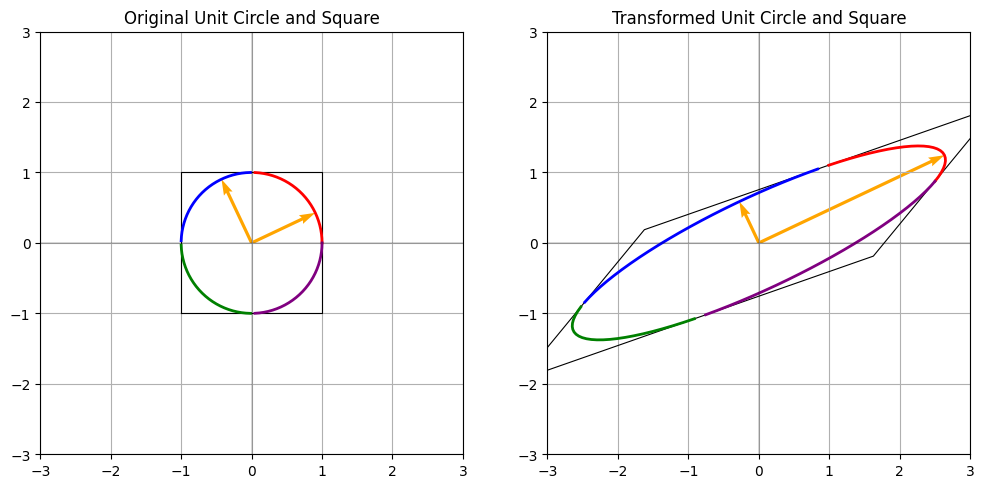

Matrix A A^T:


Matrix([
[2.3125,  1.0],
[   1.0, 1.25]])

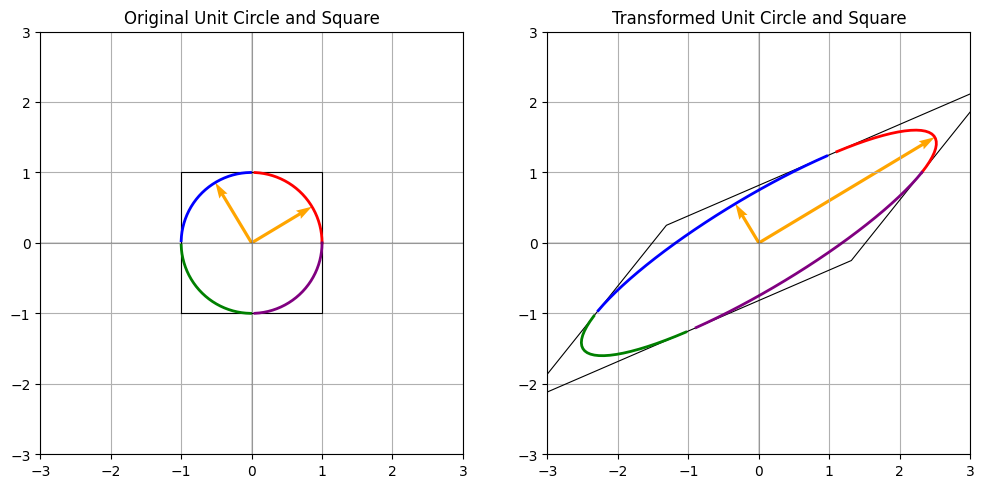

Matrix V^T (Initial Rotation):


Matrix([
[-0.904085013524728, -0.42735265100382],
[ -0.42735265100382, 0.904085013524728]])

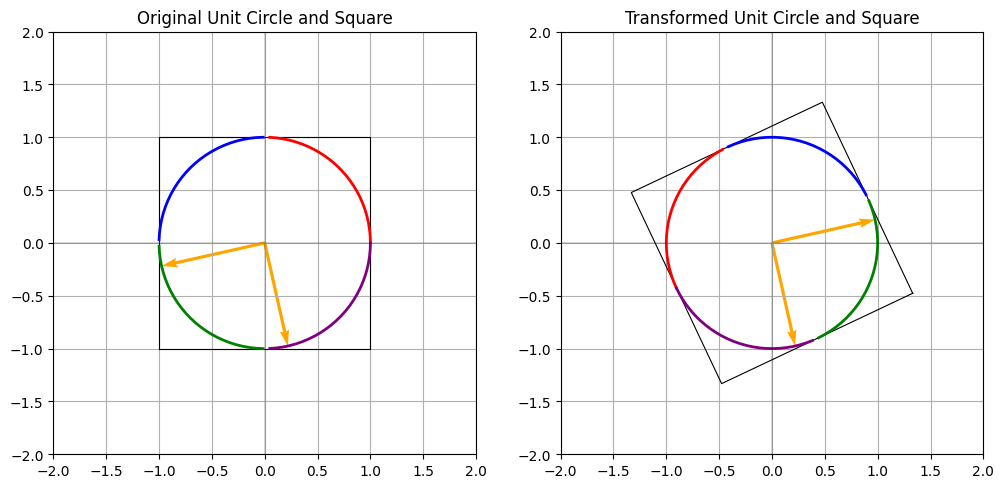

Matrix Σ (Scaling):


Matrix([
[1.70692836207311,               0.0],
[             0.0, 0.805540543207113]])

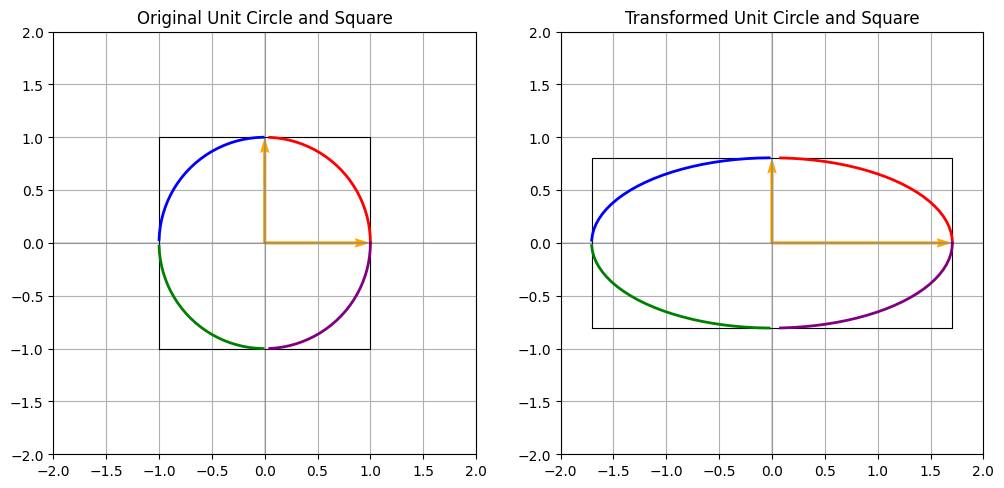

Matrix U (Final Rotation):


Matrix([
[-0.857075033460242, -0.515191602240492],
[-0.515191602240492,  0.857075033460242]])

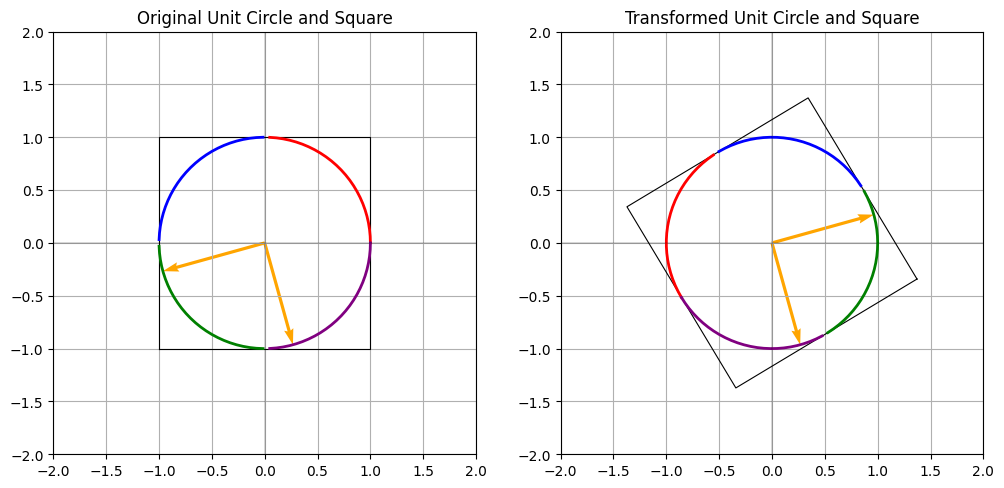



Step by step transformation:


Matrix V^T (Initial Rotation):


Matrix([
[-0.904085013524728, -0.42735265100382],
[ -0.42735265100382, 0.904085013524728]])

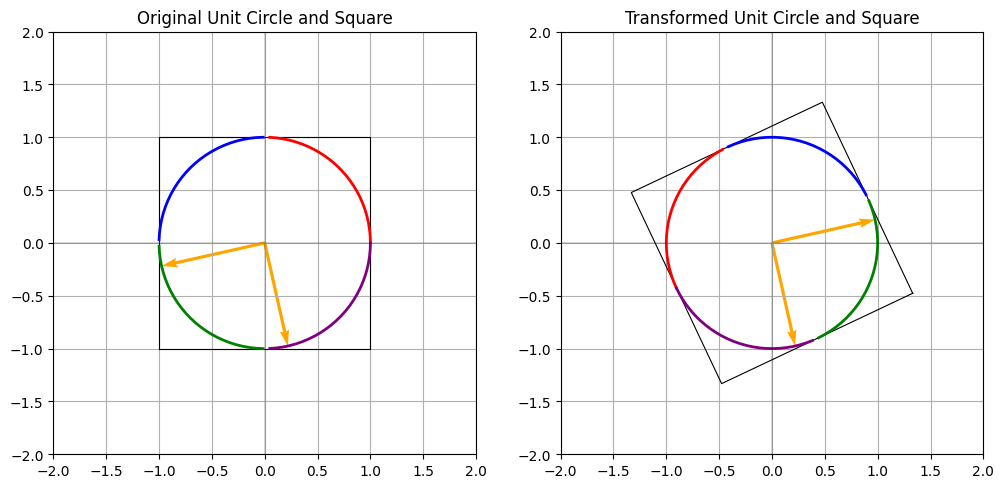

Matrix Σ * V^T:


Matrix([
[ -1.54320835131061, -0.729460360605552],
[-0.344249886630617,  0.728277132900119]])

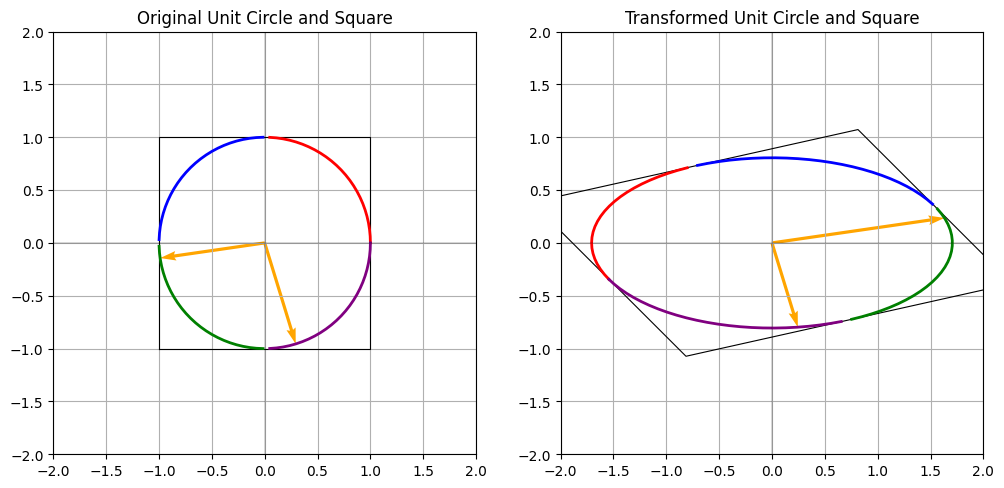

Matrix U * Σ * V^T:


Matrix([
[1.5, 0.25],
[0.5,  1.0]])

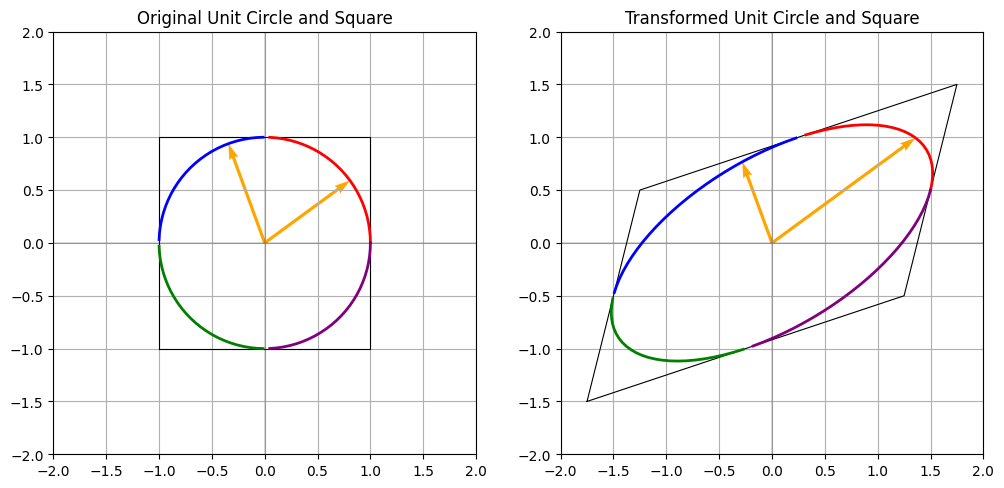

Matrix A (Full Transformation):


Matrix([
[1.5, 0.25],
[0.5,  1.0]])

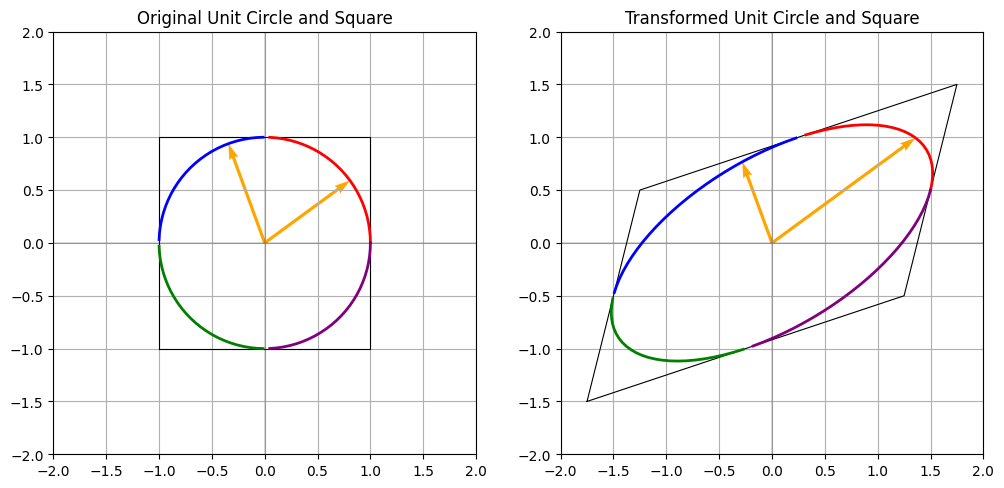

In [12]:
visualize_svd_2(np.array([
    [1.5, 0.25],
    [0.5, 1]
  ]))